In [68]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm  import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,auc,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

In [69]:
#read data

df = pd.read_csv("C:/Users/Samuel Kim/Downloads/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
df.shape

(303, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [72]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [73]:
X = df.drop('output', axis=1)
Y = df['output']

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
X_train.shape

(242, 13)

In [76]:
models = [LogisticRegression(),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state=42),DecisionTreeClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(random_state=42)]

In [77]:
def pred_modelling(models,X,Y):
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    
    for i in models:
        print(i)
        model = i.fit(X_train,Y_train)
        Y_pred = model.predict(X_test)
        print(f'Accuracy Score:{accuracy_score(Y_test,Y_pred)}')
        print(f'Precision Score:{precision_score(Y_test,Y_pred)}')
        print(f'Recall Score:{recall_score(Y_test,Y_pred)}')
        print(f'F1 Score:{f1_score(Y_test,Y_pred)}')
        cm = confusion_matrix(Y_pred,Y_test, labels=model.classes_)
        ConfusionMatrixDisplay(cm,display_labels =['No Risk','High Risk']).plot()
        plt.show()
        print(' ')

LogisticRegression()
Accuracy Score:0.8852459016393442
Precision Score:0.8787878787878788
Recall Score:0.90625
F1 Score:0.8923076923076922


C:\Users\Samuel Kim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


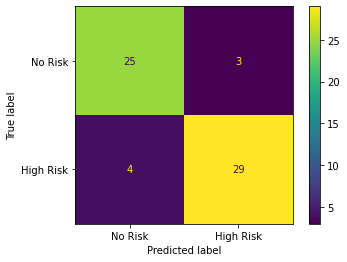

 
SVC(kernel='linear')
Accuracy Score:0.8688524590163934
Precision Score:0.875
Recall Score:0.875
F1 Score:0.875


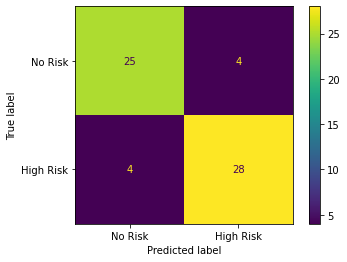

 
KNeighborsClassifier()
Accuracy Score:0.6885245901639344
Precision Score:0.6857142857142857
Recall Score:0.75
F1 Score:0.7164179104477612


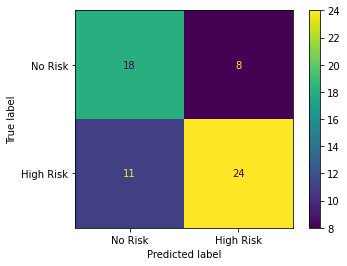

 
RandomForestClassifier(random_state=42)
Accuracy Score:0.8360655737704918
Precision Score:0.84375
Recall Score:0.84375
F1 Score:0.84375


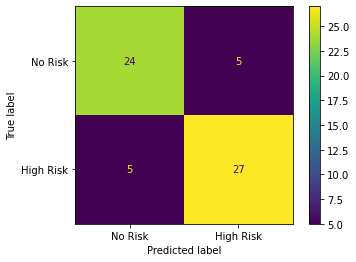

 
DecisionTreeClassifier()
Accuracy Score:0.8360655737704918
Precision Score:0.8928571428571429
Recall Score:0.78125
F1 Score:0.8333333333333334


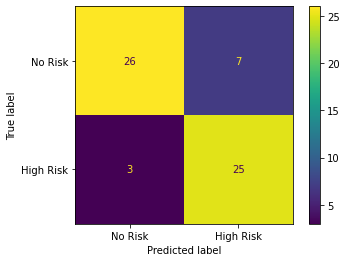

 
ExtraTreesClassifier()
Accuracy Score:0.8852459016393442
Precision Score:0.9032258064516129
Recall Score:0.875
F1 Score:0.8888888888888888


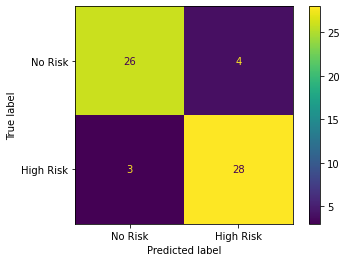

 
GradientBoostingClassifier(random_state=42)
Accuracy Score:0.7704918032786885
Precision Score:0.8
Recall Score:0.75
F1 Score:0.7741935483870969


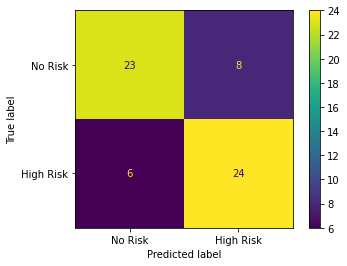

In [78]:
pred_modelling(models,X,Y)

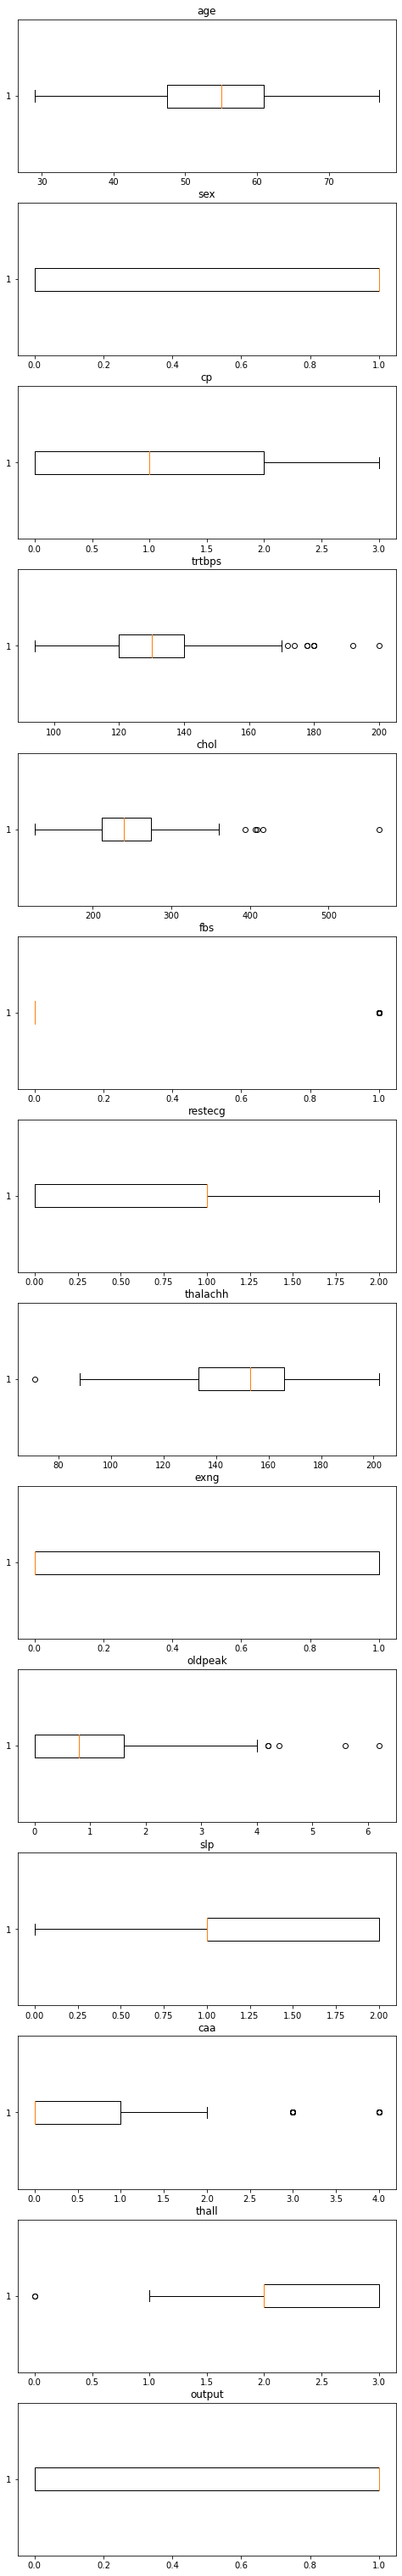

In [79]:
col = df.columns
fgi, ax = plt.subplots(len(df.columns),1 , figsize = (8,55))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(df[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)

In [80]:
x = df.iloc[:,:-1]
# x.drop('output', axis = 1, inplace = True)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [81]:
col = x.columns
std = StandardScaler()
x = std.fit_transform(x)
x = pd.DataFrame(data = x, columns = col)
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [82]:
y = df.loc[:,'output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)